In [52]:
import pandas as pd
import re
import numpy as np

In [53]:
data = pd.read_csv('original canonical only merged dataframe.csv')

In [54]:
label_file = pd.read_csv('datasets/EXPDRV+ALL.txt', sep="\t", header=None)

In [55]:
label_file.columns = ['ACC_ID','Mutation AA match','label']

In [56]:
data['Mutation AA match'] = data['Mutation AA'].apply(lambda x: x[2:])

In [57]:
np.sort(list(data.groupby('ACC_ID').size()))

array([    1,     1,     1, ...,   495,   626, 18239])

In [58]:
cont = pd.read_csv('Cosmic_allDB_Psites_contactMap.txt',sep='\t')

In [59]:
cont.columns = ['UP_POS','ACC_ID','PTM_contact']

In [11]:
df_Cosmic = pd.read_csv('CosmicGenomeScreensMutantExport.tsv', sep='\t', usecols=[5,8,11,13])


In [12]:
df_Cosmic = df_Cosmic.reset_index()

In [13]:
df_Cosmic.drop('ID_sample',inplace=True,axis = 1)

In [14]:
df_Cosmic

,index,Site subtype 1,Primary histology,Histology subtype 2
0,0,NS,carcinoma,NS
1,1,NS,carcinoma,NS
2,2,NS,carcinoma,NS
3,3,NS,carcinoma,NS
4,4,gastroesophageal_junction,carcinoma,NS
...,...,...,...,...
46212377,46212377,NS,lymphoid_neoplasm,NS
46212378,46212378,NS,other,NS
46212379,46212379,bile_duct,carcinoma,NS
46212380,46212380,NS,other,NS


In [60]:
data = data.merge(df_Cosmic, how='inner', on=['index'], sort=False, indicator=False, copy=False, validate='m:m' )

In [61]:
data

,Mutation AA,index,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Mutation AA match,Site subtype 1,Primary histology,Histology subtype 2
0,p.P359L,1057,Q9UQF2,355,PhosphoS,359,-4,P359L,NS,carcinoma,NS
1,p.S895F,1591,Q69YQ0,893,PhosphoS,895,-2,S895F,NS,carcinoma,NS
2,p.S45P,1758,P35222,45,PhosphoS,45,0,S45P,NS,carcinoma,NS
3,p.T338I,2369,Q9H0H5,342,PhosphoT,338,4,T338I,NS,lymphoid_neoplasm,NS
4,p.S45P,3130,P35222,45,PhosphoS,45,0,S45P,brain,glioma,glioblastoma_multiforme
...,...,...,...,...,...,...,...,...,...,...,...
57836,p.S33P,44393309,P35222,30,PhosphoY,33,-3,S33P,NS,carcinoma,NS
57837,p.P1746S,44393579,Q14686,1749,PhosphoT,1746,3,P1746S,bile_duct,carcinoma,NS
57838,p.P1746S,44393579,Q14686,1751,PhosphoS,1746,5,P1746S,bile_duct,carcinoma,NS
57839,p.E382K,44396386,P08172,380,PhosphoS,382,-2,E382K,NS,carcinoma,NS


In [62]:
data.drop_duplicates()

,Mutation AA,index,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Mutation AA match,Site subtype 1,Primary histology,Histology subtype 2
0,p.P359L,1057,Q9UQF2,355,PhosphoS,359,-4,P359L,NS,carcinoma,NS
1,p.S895F,1591,Q69YQ0,893,PhosphoS,895,-2,S895F,NS,carcinoma,NS
2,p.S45P,1758,P35222,45,PhosphoS,45,0,S45P,NS,carcinoma,NS
3,p.T338I,2369,Q9H0H5,342,PhosphoT,338,4,T338I,NS,lymphoid_neoplasm,NS
4,p.S45P,3130,P35222,45,PhosphoS,45,0,S45P,brain,glioma,glioblastoma_multiforme
...,...,...,...,...,...,...,...,...,...,...,...
57836,p.S33P,44393309,P35222,30,PhosphoY,33,-3,S33P,NS,carcinoma,NS
57837,p.P1746S,44393579,Q14686,1749,PhosphoT,1746,3,P1746S,bile_duct,carcinoma,NS
57838,p.P1746S,44393579,Q14686,1751,PhosphoS,1746,5,P1746S,bile_duct,carcinoma,NS
57839,p.E382K,44396386,P08172,380,PhosphoS,382,-2,E382K,NS,carcinoma,NS


In [63]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Modification_name'>

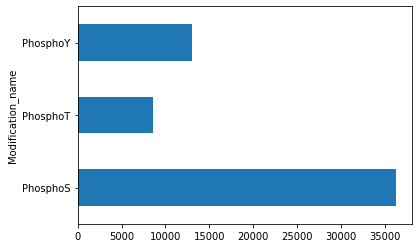

In [64]:
data.groupby('Modification_name').size().plot.barh()

<AxesSubplot:ylabel='ACC_ID'>

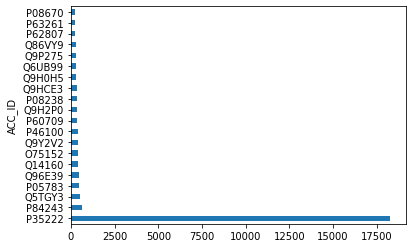

In [65]:
data.groupby('ACC_ID').size().sort_values(ascending=False)[:20].plot.barh()

<AxesSubplot:ylabel='Primary histology'>

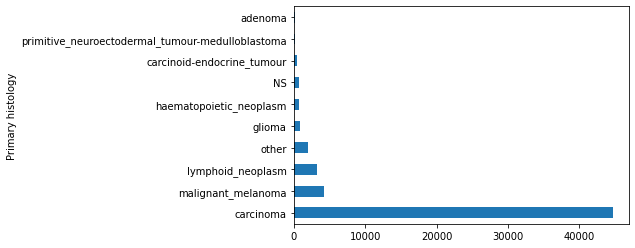

In [66]:
data.groupby('Primary histology').size().sort_values(ascending=False)[:10].plot.barh()

In [67]:
#data = data.merge(label_file, how='inner', on=['ACC_ID','Mutation AA match'], sort=False, indicator=False, copy=False, validate='m:m' ).drop_duplicates()

In [68]:
data

,Mutation AA,index,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Mutation AA match,Site subtype 1,Primary histology,Histology subtype 2
0,p.P359L,1057,Q9UQF2,355,PhosphoS,359,-4,P359L,NS,carcinoma,NS
1,p.S895F,1591,Q69YQ0,893,PhosphoS,895,-2,S895F,NS,carcinoma,NS
2,p.S45P,1758,P35222,45,PhosphoS,45,0,S45P,NS,carcinoma,NS
3,p.T338I,2369,Q9H0H5,342,PhosphoT,338,4,T338I,NS,lymphoid_neoplasm,NS
4,p.S45P,3130,P35222,45,PhosphoS,45,0,S45P,brain,glioma,glioblastoma_multiforme
...,...,...,...,...,...,...,...,...,...,...,...
57836,p.S33P,44393309,P35222,30,PhosphoY,33,-3,S33P,NS,carcinoma,NS
57837,p.P1746S,44393579,Q14686,1749,PhosphoT,1746,3,P1746S,bile_duct,carcinoma,NS
57838,p.P1746S,44393579,Q14686,1751,PhosphoS,1746,5,P1746S,bile_duct,carcinoma,NS
57839,p.E382K,44396386,P08172,380,PhosphoS,382,-2,E382K,NS,carcinoma,NS


In [69]:
tmp = []
with open('humsavar.txt') as file:
    for line in file:
        tmp.append((re.split(r'\s{2,}', line)[1:5]))

In [70]:
labels_hums = []
for i,v in enumerate(tmp):
    try:
        lab = -1
        if v[3] == 'LB/B':
            lab = 0
        elif v[3] == 'LP/P':
            lab = 1
        else:
            lab = -1
        labels_hums.append([v[0],v[2][2] + re.findall(r'\d+', v[2])[0] + v[2][-3],lab])
    except:
        pass
    #print(v[2][2] + re.findall(r'\d+', v[2])[0] + v[2][-3])

In [71]:
humsvar = pd.DataFrame(labels_hums,columns = ['ACC_ID','Mutation AA match','label'])

In [72]:
humsvar = humsvar.append(label_file).drop_duplicates(['ACC_ID','Mutation AA match'])

In [73]:
humsvar

,ACC_ID,Mutation AA match,label
0,P04217,H52A,0
1,P04217,H395A,0
2,Q9NQ94,V555M,0
3,Q9NQ94,A558S,0
4,P01023,A704H,0
...,...,...,...
63517,Q8WXA8,N163K,0
63519,Q7Z736,Q547H,0
63520,Q53TS8,H376Q,0
63521,Q8WXA3,C608S,0


In [74]:
data

,Mutation AA,index,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Mutation AA match,Site subtype 1,Primary histology,Histology subtype 2
0,p.P359L,1057,Q9UQF2,355,PhosphoS,359,-4,P359L,NS,carcinoma,NS
1,p.S895F,1591,Q69YQ0,893,PhosphoS,895,-2,S895F,NS,carcinoma,NS
2,p.S45P,1758,P35222,45,PhosphoS,45,0,S45P,NS,carcinoma,NS
3,p.T338I,2369,Q9H0H5,342,PhosphoT,338,4,T338I,NS,lymphoid_neoplasm,NS
4,p.S45P,3130,P35222,45,PhosphoS,45,0,S45P,brain,glioma,glioblastoma_multiforme
...,...,...,...,...,...,...,...,...,...,...,...
57836,p.S33P,44393309,P35222,30,PhosphoY,33,-3,S33P,NS,carcinoma,NS
57837,p.P1746S,44393579,Q14686,1749,PhosphoT,1746,3,P1746S,bile_duct,carcinoma,NS
57838,p.P1746S,44393579,Q14686,1751,PhosphoS,1746,5,P1746S,bile_duct,carcinoma,NS
57839,p.E382K,44396386,P08172,380,PhosphoS,382,-2,E382K,NS,carcinoma,NS


In [76]:
data = data.merge(humsvar[['Mutation AA match','label']], how='inner', on=['Mutation AA match'], sort=False, indicator=False, copy=False, validate='m:m' ).drop_duplicates()

In [77]:
#data = data.merge(humsvar, how='inner', on=['ACC_ID','Mutation AA match'], sort=False, indicator=False, copy=False, validate='m:m' )

In [78]:
data.drop_duplicates(inplace= True)

In [79]:
data.drop(['index','Mutation AA match'],axis= 1,inplace = True)

In [80]:
tmp = data['Mutation AA']

In [81]:
tmp

0         p.P359L
1         p.P359L
4         p.P359L
5         p.P359L
8         p.P359L
           ...   
111496    p.A462T
111497    p.A462T
111500    p.G494C
111501    p.G494C
111502    p.R644C
Name: Mutation AA, Length: 64971, dtype: object

In [82]:
left = []
right = []
for i in tmp:
    left.append(i[2])
    right.append(i[-1])

In [83]:
data.drop('Mutation AA',axis= 1,inplace = True)

In [84]:
data['left'] = left
data['right'] = right

In [85]:
data

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,label,left,right
0,Q9UQF2,355,PhosphoS,359,-4,NS,carcinoma,NS,0,P,L
1,Q9UQF2,355,PhosphoS,359,-4,NS,carcinoma,NS,1,P,L
4,Q9UQF2,355,PhosphoS,359,-4,NS,malignant_melanoma,NS,0,P,L
5,Q9UQF2,355,PhosphoS,359,-4,NS,malignant_melanoma,NS,1,P,L
8,Q9BWN1,363,PhosphoT,359,4,NS,carcinoma,NS,0,P,L
...,...,...,...,...,...,...,...,...,...,...,...
111496,P16435,457,PhosphoS,462,-5,NS,carcinoma,NS,-1,A,T
111497,P16435,457,PhosphoS,462,-5,NS,carcinoma,NS,0,A,T
111500,P40222,495,PhosphoS,494,1,NS,carcinoma,NS,1,G,C
111501,P40222,499,PhosphoS,494,5,NS,carcinoma,NS,1,G,C


<AxesSubplot:ylabel='left,right'>

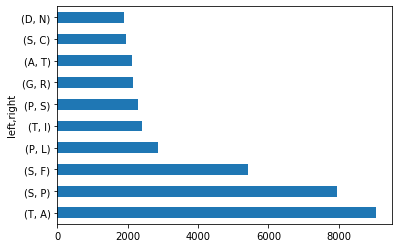

In [86]:
data.groupby(['left','right']).size().sort_values(ascending=False)[:10].plot.barh()

In [87]:
#data.merge(cont, how='inner', on=['ACC_ID','UP_POS'], sort=False, indicator=False, copy=False, validate='m:m' ).drop_duplicates()

<AxesSubplot:ylabel='label'>

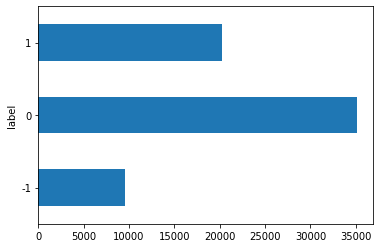

In [88]:
data.groupby('label').size().plot.barh()

<AxesSubplot:title={'center':'C'}, ylabel='left,right'>

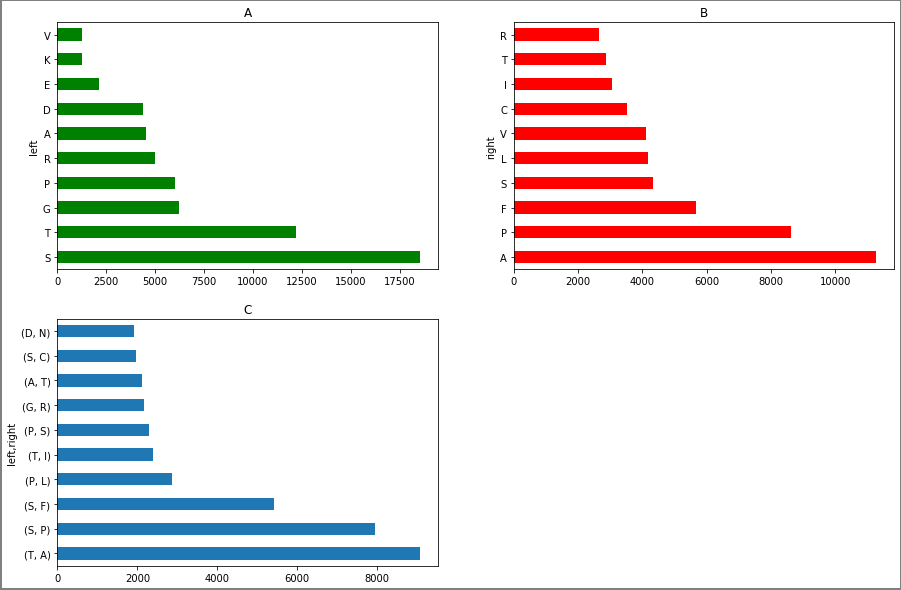

In [89]:
plt.figure(figsize=(15, 10),edgecolor='grey',linewidth=4)
plt.subplot(2,2,1)
data.groupby('left').size().sort_values(ascending=False)[:10].plot.barh(color='green',title='A') #no need to specify for first axis
plt.subplot(2,2,2)
data.groupby('right').size().sort_values(ascending=False)[:10].plot.barh(color='red',title='B')
plt.subplot(2,2,3)
data.groupby(['left','right']).size().sort_values(ascending=False)[:10].plot.barh(title='C')

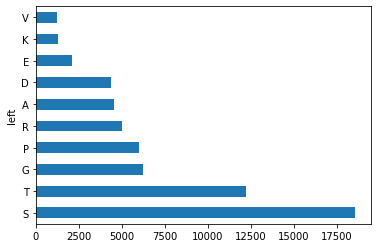

In [90]:
ab = data.groupby('left').size().sort_values(ascending=False)[:10].plot.barh()

<AxesSubplot:ylabel='left'>

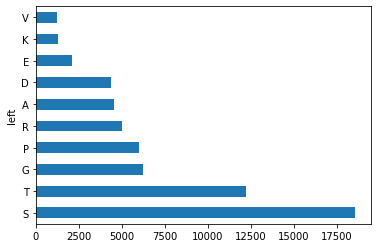

In [91]:
data.groupby('left').size().sort_values(ascending=False)[:10].plot.barh()

<AxesSubplot:ylabel='right'>

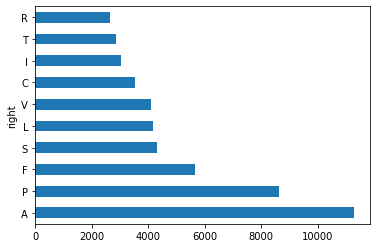

In [92]:
data.groupby('right').size().sort_values(ascending=False)[:10].plot.barh()

In [93]:
data[data['ACC_ID'] == 'P35222']

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,label,left,right
36,P35222,45,PhosphoS,45,0,NS,carcinoma,NS,-1,S,P
37,P35222,45,PhosphoS,45,0,NS,carcinoma,NS,0,S,P
38,P35222,45,PhosphoS,45,0,NS,carcinoma,NS,1,S,P
41,P35222,45,PhosphoS,45,0,brain,glioma,glioblastoma_multiforme,-1,S,P
42,P35222,45,PhosphoS,45,0,brain,glioma,glioblastoma_multiforme,0,S,P
...,...,...,...,...,...,...,...,...,...,...,...
71929,P35222,716,PhosphoY,714,2,NS,carcinoma,NS,0,P,L
71931,P35222,716,PhosphoY,714,2,NS,NS,NS,-1,P,L
71932,P35222,716,PhosphoY,714,2,NS,NS,NS,0,P,L
71934,P35222,716,PhosphoY,714,2,NS,carcinoma,NS,-1,P,L


In [127]:
data.groupby('ACC_ID').size()

ACC_ID
0.0        3
1.0        5
2.0        1
3.0        1
4.0       66
          ..
1332.0    90
1333.0     8
1334.0     3
1335.0    29
1336.0    34
Length: 1337, dtype: int64

In [95]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["ACC_ID"] = ord_enc.fit_transform(data[["ACC_ID"]])
data["Modification_name"] = ord_enc.fit_transform(data[["Modification_name"]])
data["left"] = ord_enc.fit_transform(data[["left"]])
data["right"] = ord_enc.fit_transform(data[["right"]])
data["Site subtype 1"] = ord_enc.fit_transform(data[["Site subtype 1"]])
data["Primary histology"] = ord_enc.fit_transform(data[["Primary histology"]])
data["Histology subtype 2"] = ord_enc.fit_transform(data[["Histology subtype 2"]])


In [96]:
data_oh = pd.get_dummies(data.drop(['ACC_ID'], axis = 1))

In [97]:
data

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,label,left,right
0,1279.0,355,0.0,359,-4,0.0,10.0,6.0,0,12.0,9.0
1,1279.0,355,0.0,359,-4,0.0,10.0,6.0,1,12.0,9.0
4,1279.0,355,0.0,359,-4,0.0,25.0,6.0,0,12.0,9.0
5,1279.0,355,0.0,359,-4,0.0,25.0,6.0,1,12.0,9.0
8,1086.0,363,1.0,359,4,0.0,10.0,6.0,0,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
111496,281.0,457,0.0,462,-5,0.0,10.0,6.0,-1,0.0,16.0
111497,281.0,457,0.0,462,-5,0.0,10.0,6.0,0,0.0,16.0
111500,349.0,495,0.0,494,1,0.0,10.0,6.0,1,5.0,1.0
111501,349.0,499,0.0,494,5,0.0,10.0,6.0,1,5.0,1.0


In [98]:
data_oh

,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,label,left,right
0,355,0.0,359,-4,0.0,10.0,6.0,0,12.0,9.0
1,355,0.0,359,-4,0.0,10.0,6.0,1,12.0,9.0
4,355,0.0,359,-4,0.0,25.0,6.0,0,12.0,9.0
5,355,0.0,359,-4,0.0,25.0,6.0,1,12.0,9.0
8,363,1.0,359,4,0.0,10.0,6.0,0,12.0,9.0
...,...,...,...,...,...,...,...,...,...,...
111496,457,0.0,462,-5,0.0,10.0,6.0,-1,0.0,16.0
111497,457,0.0,462,-5,0.0,10.0,6.0,0,0.0,16.0
111500,495,0.0,494,1,0.0,10.0,6.0,1,5.0,1.0
111501,499,0.0,494,5,0.0,10.0,6.0,1,5.0,1.0


In [100]:
import seaborn

In [ ]:

seaborn.pairplot(data[[ 'UP_POS', 'Modification_name', 'sliced AA', 'Distance', 'label',
       'left', 'right']], hue='label',diag_kind="hist")

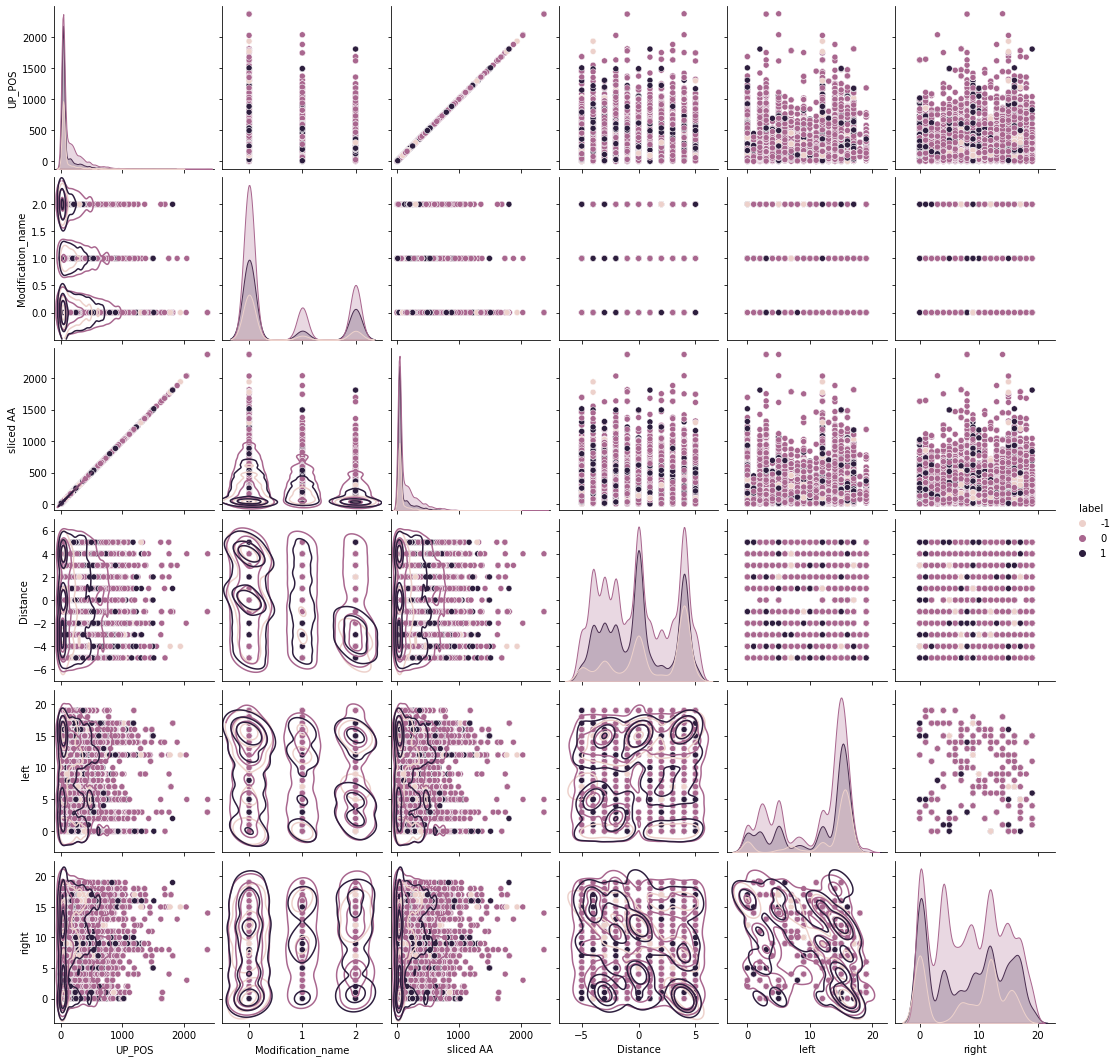

In [102]:
g = seaborn.pairplot(data[[ 'UP_POS', 'Modification_name', 'sliced AA', 'Distance', 'label',
       'left', 'right']], diag_kind="kde",hue='label')
g.map_lower(seaborn.kdeplot, levels=4, color=".2")

<AxesSubplot:>

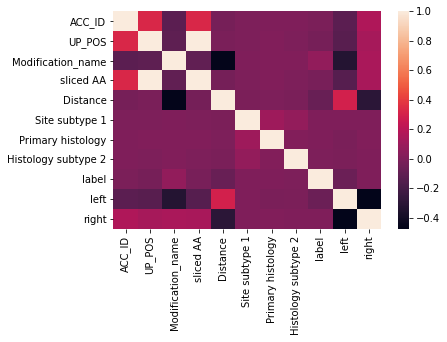

In [101]:
seaborn.heatmap(data.corr(),
                xticklabels=data.columns,
                yticklabels=data.columns)

In [124]:
data[data.ACC_ID == 336]

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,label,left,right
36,336.0,45,0.0,45,0,0.0,10.0,6.0,-1,15.0,12.0
37,336.0,45,0.0,45,0,0.0,10.0,6.0,0,15.0,12.0
38,336.0,45,0.0,45,0,0.0,10.0,6.0,1,15.0,12.0
41,336.0,45,0.0,45,0,13.0,19.0,15.0,-1,15.0,12.0
42,336.0,45,0.0,45,0,13.0,19.0,15.0,0,15.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
71929,336.0,716,2.0,714,2,0.0,10.0,6.0,0,12.0,9.0
71931,336.0,716,2.0,714,2,0.0,1.0,6.0,-1,12.0,9.0
71932,336.0,716,2.0,714,2,0.0,1.0,6.0,0,12.0,9.0
71934,336.0,716,2.0,714,2,0.0,10.0,6.0,-1,12.0,9.0


In [104]:
import pprint
pprint.pprint(data.groupby(['label']).size())

label
-1     9580
 0    35142
 1    20249
dtype: int64


In [105]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
   data.drop(['label'], axis = 1), data['label'], test_size=0.50, random_state=69)

In [151]:
#X_train = data[data['ACC_ID'] != 336].drop('label',axis=1)
#y_train = data[data['ACC_ID'] != 336]['label']
#X_test =  data[data['ACC_ID'] == 336].drop('label',axis=1)
#y_test =  data[data['ACC_ID'] == 336]['label']

In [152]:
X_train

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,left,right
25059,336.0,45,0.0,41,4,0.0,10.0,6.0,16.0,0.0
73226,252.0,61,0.0,64,-3,0.0,24.0,6.0,5.0,18.0
34222,336.0,45,0.0,45,0,0.0,31.0,6.0,15.0,4.0
28856,336.0,30,2.0,34,-4,0.0,10.0,6.0,5.0,17.0
58376,1147.0,113,1.0,115,-2,0.0,10.0,6.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...
16422,336.0,45,0.0,41,4,69.0,24.0,6.0,16.0,0.0
102677,1085.0,147,0.0,144,3,0.0,10.0,30.0,3.0,8.0
6741,336.0,45,0.0,45,0,10.0,10.0,6.0,15.0,12.0
95844,1222.0,71,0.0,76,-5,40.0,10.0,6.0,0.0,17.0


In [153]:
X_test

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,left,right
30690,336.0,30,2.0,33,-3,0.0,10.0,6.0,15.0,0.0
2837,336.0,45,0.0,45,0,0.0,10.0,6.0,15.0,12.0
80086,468.0,226,0.0,224,2,0.0,10.0,6.0,9.0,10.0
109238,272.0,401,1.0,401,0,0.0,1.0,6.0,16.0,0.0
103809,1331.0,49,0.0,52,-3,20.0,10.0,6.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...
111120,871.0,65,0.0,68,-3,0.0,10.0,6.0,12.0,6.0
30956,336.0,45,0.0,41,4,20.0,10.0,6.0,16.0,7.0
84792,551.0,38,1.0,40,-2,0.0,10.0,6.0,14.0,6.0
94215,861.0,87,0.0,83,4,0.0,10.0,6.0,4.0,9.0


In [154]:
from collections import Counter
Counter(y_test)

Counter({0: 17694, -1: 4724, 1: 10068})

In [155]:
Counter(y_train)

Counter({0: 17448, 1: 10181, -1: 4856})

In [156]:
X_train

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Site subtype 1,Primary histology,Histology subtype 2,left,right
25059,336.0,45,0.0,41,4,0.0,10.0,6.0,16.0,0.0
73226,252.0,61,0.0,64,-3,0.0,24.0,6.0,5.0,18.0
34222,336.0,45,0.0,45,0,0.0,31.0,6.0,15.0,4.0
28856,336.0,30,2.0,34,-4,0.0,10.0,6.0,5.0,17.0
58376,1147.0,113,1.0,115,-2,0.0,10.0,6.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...
16422,336.0,45,0.0,41,4,69.0,24.0,6.0,16.0,0.0
102677,1085.0,147,0.0,144,3,0.0,10.0,30.0,3.0,8.0
6741,336.0,45,0.0,45,0,10.0,10.0,6.0,15.0,12.0
95844,1222.0,71,0.0,76,-5,40.0,10.0,6.0,0.0,17.0


In [140]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
clf=RandomForestClassifier(n_estimators = 100,class_weight= 'balanced_subsample')
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample')

In [158]:
preds = clf.predict(X_test)

In [159]:
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6676312144066492
0.5627654989841778


In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
cm = confusion_matrix(y_test, preds,  labels = [-1, 0, 1])
cm

array([[3767,  478,  479],
       [3802, 9715, 4177],
       [3407, 1861, 4800]], dtype=int64)

In [162]:
from sklearn.metrics import f1_score
f1_score(y_test, preds, average='macro')

0.541576094864512

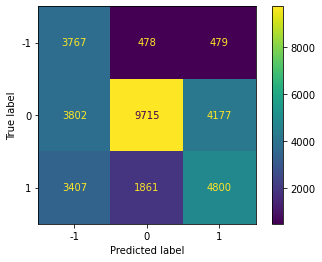

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.34      0.80      0.48      4724
           0       0.81      0.55      0.65     17694
           1       0.51      0.48      0.49     10068

    accuracy                           0.56     32486
   macro avg       0.55      0.61      0.54     32486
weighted avg       0.65      0.56      0.58     32486



<AxesSubplot:>

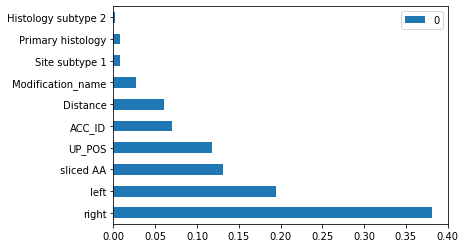

In [121]:
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)[:20].plot.barh()

In [166]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [167]:
# Number of trees in random forest
n_estimators = np.linspace(100, 2000, int((1000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 7,10,12,15 ,20]# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
class_weight= ['balanced_subsample']
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [168]:
random_grid

{'n_estimators': array([ 100,  575, 1050, 1525, 2000]),
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 5, 7, 10, 12, 15, 20],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [169]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Basit\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Basit\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Basit\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\Basit\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  575, 1050, 1525, 2000])},
                   random_state=42, verbose=2)

In [170]:
rf_random.best_params_

{'n_estimators': 1050,
 'min_samples_split': 20,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy',
 'bootstrap': False}

In [171]:
print (rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))

0.5855010004617516
0.5898540909930432


In [172]:
preds = rf_random.predict(X_test)

In [173]:
cm = confusion_matrix(y_test, preds,  labels = [-1, 0, 1])

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

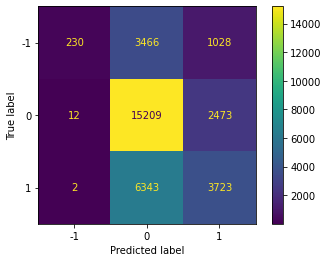

In [175]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_random.classes_)
disp.plot()

plt.show()

In [176]:
from sklearn.metrics import classification_report

In [177]:
print(classification_report(y_test, preds, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.94      0.05      0.09      4724
           0       0.61      0.86      0.71     17694
           1       0.52      0.37      0.43     10068

    accuracy                           0.59     32486
   macro avg       0.69      0.43      0.41     32486
weighted avg       0.63      0.59      0.53     32486



<AxesSubplot:>

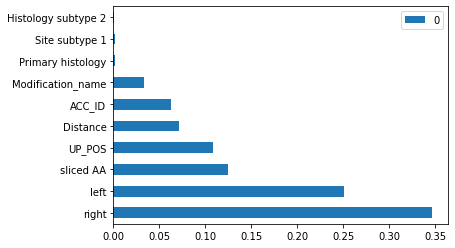

In [178]:
pd.DataFrame(rf_random.best_estimator_.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False).plot.barh()

In [106]:
from sklearn import tree

In [107]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
import g

In [85]:
y_train_xg =  [2 if x==-1 else x for x in y_train]

In [86]:
y_test_xg =  [2 if x==-1 else x for x in y_test]

In [87]:
y_trian_xg

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,


In [98]:
# import machine learning libraries
import xgboost as xgb
import warnings
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [99]:
space={'max_depth': hp.quniform("max_depth", 3, 20, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 10,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.randint('n_estimators', 50, 5000),
        'seed': 0
    }

In [102]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),objective='multi:softprob')
    
    evaluation = [(X_train, y_train_xg),( X_test, y_test_xg)]
    
    clf.fit(X_train, y_train_xg,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=50,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = f1_score(y_test_xg, pred, average='macro')
    print ("F1:", accuracy)
    #print(confusion_matrix(y_test_xg,  pred))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [103]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 1000,
                        trials = trials)

F1:                                                                                                                    
0.41177283561086436                                                                                                    
F1:                                                                                                                    
0.4143598907175858                                                                                                     
F1:                                                                                                                    
0.42324511370207246                                                                                                    
F1:                                                                                                                    
0.41635180377282194                                                                                                    
F1:                                     

F1:                                                                                                                    
0.4580518667643681                                                                                                     
F1:                                                                                                                    
0.4564807391266494                                                                                                     
F1:                                                                                                                    
0.42426865642527395                                                                                                    
F1:                                                                                                                    
0.4116113586520884                                                                                                     
F1:                                     

F1:                                                                                                                    
0.4809397329518883                                                                                                     
F1:                                                                                                                    
0.4237326545560493                                                                                                     
F1:                                                                                                                    
0.4564901982958294                                                                                                     
F1:                                                                                                                    
0.4238002396183766                                                                                                     
F1:                                     

F1:                                                                                                                    
0.45623668520989136                                                                                                    
F1:                                                                                                                    
0.41699566866587906                                                                                                    
F1:                                                                                                                    
0.455788325068426                                                                                                      
F1:                                                                                                                    
0.41646124917251814                                                                                                    
F1:                                     

F1:                                                                                                                    
0.48095058972892346                                                                                                    
F1:                                                                                                                    
0.4234821223159166                                                                                                     
F1:                                                                                                                    
0.4539084289274511                                                                                                     
F1:                                                                                                                    
0.4541125203436347                                                                                                     
F1:                                     

F1:                                                                                                                    
0.4541875553617781                                                                                                     
F1:                                                                                                                    
0.48066824779787454                                                                                                    
F1:                                                                                                                    
0.4560620034531397                                                                                                     
F1:                                                                                                                    
0.4568965464237191                                                                                                     
F1:                                     

F1:                                                                                                                    
0.4578364669025466                                                                                                     
F1:                                                                                                                    
0.4115437100088683                                                                                                     
F1:                                                                                                                    
0.4238924056686524                                                                                                     
F1:                                                                                                                    
0.4804689943863852                                                                                                     
F1:                                     

F1:                                                                                                                    
0.4076012381427185                                                                                                     
F1:                                                                                                                    
0.4141768871106594                                                                                                     
F1:                                                                                                                    
0.4115869103126524                                                                                                     
F1:                                                                                                                    
0.4547714867131009                                                                                                     
F1:                                     

F1:                                                                                                                    
0.4574709987675239                                                                                                     
F1:                                                                                                                    
0.45759675054288357                                                                                                    
F1:                                                                                                                    
0.4557708036956704                                                                                                     
F1:                                                                                                                    
0.45596648888254315                                                                                                    
F1:                                     

F1:                                                                                                                    
0.4810609203167848                                                                                                     
F1:                                                                                                                    
0.45691288906355854                                                                                                    
F1:                                                                                                                    
0.45393227701426375                                                                                                    
F1:                                                                                                                    
0.45429144674903066                                                                                                    
F1:                                     

F1:                                                                                                                    
0.4558482488980648                                                                                                     
F1:                                                                                                                    
0.45806188436931633                                                                                                    
F1:                                                                                                                    
0.45377230007550096                                                                                                    
F1:                                                                                                                    
0.4815014392939403                                                                                                     
F1:                                     

F1:                                                                                                                    
0.45450051023999305                                                                                                    
F1:                                                                                                                    
0.4560942883211709                                                                                                     
F1:                                                                                                                    
0.4238400841133744                                                                                                     
F1:                                                                                                                    
0.4236863011758749                                                                                                     
F1:                                     

F1:                                                                                                                    
0.481130055965355                                                                                                      
F1:                                                                                                                    
0.4542086871958137                                                                                                     
F1:                                                                                                                    
0.48175558340740937                                                                                                    
F1:                                                                                                                    
0.457431366766154                                                                                                      
F1:                                     

F1:                                                                                                                    
0.45785217782857895                                                                                                    
F1:                                                                                                                    
0.41686546005490976                                                                                                    
F1:                                                                                                                    
0.4576620228559997                                                                                                     
F1:                                                                                                                    
0.4539785857050626                                                                                                     
F1:                                     

F1:                                                                                                                    
0.45551496907089867                                                                                                    
F1:                                                                                                                    
0.4168451386431187                                                                                                     
F1:                                                                                                                    
0.4141914529564499                                                                                                     
F1:                                                                                                                    
0.4550492974085861                                                                                                     
F1:                                     

F1:                                                                                                                    
0.48142373952439793                                                                                                    
F1:                                                                                                                    
0.48092740537741446                                                                                                    
F1:                                                                                                                    
0.45639615947136325                                                                                                    
F1:                                                                                                                    
0.45717942672017964                                                                                                    
F1:                                     

F1:                                                                                                                    
0.4547581365742945                                                                                                     
F1:                                                                                                                    
0.45506917050681883                                                                                                    
F1:                                                                                                                    
0.45689051933408376                                                                                                    
F1:                                                                                                                    
0.4557786050709905                                                                                                     
F1:                                     

F1:                                                                                                                    
0.462121353858514                                                                                                      
F1:                                                                                                                    
0.4580770388166428                                                                                                     
F1:                                                                                                                    
0.4820672907994615                                                                                                     
F1:                                                                                                                    
0.4815333684012158                                                                                                     
F1:                                     

F1:                                                                                                                    
0.45414634481873245                                                                                                    
F1:                                                                                                                    
0.42298818415060757                                                                                                    
F1:                                                                                                                    
0.45711849324751674                                                                                                    
F1:                                                                                                                    
0.4165425526379196                                                                                                     
F1:                                     

F1:                                                                                                                    
0.41434344449410276                                                                                                    
F1:                                                                                                                    
0.3994383397968315                                                                                                     
F1:                                                                                                                    
0.45598353404001446                                                                                                    
F1:                                                                                                                    
0.481771419669726                                                                                                      
F1:                                     

F1:                                                                                                                    
0.4582585424545191                                                                                                     
F1:                                                                                                                    
0.45417467591433275                                                                                                    
F1:                                                                                                                    
0.45587419299610965                                                                                                    
F1:                                                                                                                    
0.4821187203456458                                                                                                     
F1:                                     

F1:                                                                                                                    
0.45751730562309617                                                                                                    
F1:                                                                                                                    
0.457028863198719                                                                                                      
F1:                                                                                                                    
0.45735693940950134                                                                                                    
F1:                                                                                                                    
0.457044205838788                                                                                                      
F1:                                     

F1:                                                                                                                    
0.42411744115655026                                                                                                    
F1:                                                                                                                    
0.41704679566008585                                                                                                    
F1:                                                                                                                    
0.4164239420135152                                                                                                     
F1:                                                                                                                    
0.42574162076343663                                                                                                    
F1:                                     

F1:                                                                                                                    
0.4573134121453466                                                                                                     
F1:                                                                                                                    
0.4579077488481175                                                                                                     
F1:                                                                                                                    
0.45977278196020926                                                                                                    
F1:                                                                                                                    
0.48214912067879295                                                                                                    
F1:                                     

F1:                                                                                                                    
0.48044703575727626                                                                                                    
F1:                                                                                                                    
0.45789862903640377                                                                                                    
F1:                                                                                                                    
0.45923261219787753                                                                                                    
F1:                                                                                                                    
0.4584201705334949                                                                                                     
F1:                                     

F1:                                                                                                                    
0.45866764509729546                                                                                                    
F1:                                                                                                                    
0.4560276315108145                                                                                                     
F1:                                                                                                                    
0.42350975683165676                                                                                                    
F1:                                                                                                                    
0.4574345007998825                                                                                                     
F1:                                     

F1:                                                                                                                    
0.4561699538845381                                                                                                     
F1:                                                                                                                    
0.4242401498690467                                                                                                     
F1:                                                                                                                    
0.45653049398410567                                                                                                    
F1:                                                                                                                    
0.45681464255024656                                                                                                    
F1:                                     

F1:                                                                                                                    
0.45692570136549987                                                                                                    
F1:                                                                                                                    
0.4575927840233345                                                                                                     
F1:                                                                                                                    
0.45723648584246296                                                                                                    
F1:                                                                                                                    
0.4242506322922779                                                                                                     
F1:                                     

F1:                                                                                                                    
0.42421516702245293                                                                                                    
F1:                                                                                                                    
0.41423547162262125                                                                                                    
F1:                                                                                                                    
0.45802881877150065                                                                                                    
F1:                                                                                                                    
0.42664695698256466                                                                                                    
F1:                                     

F1:                                                                                                                    
0.45979097754723086                                                                                                    
F1:                                                                                                                    
0.41662137366707724                                                                                                    
F1:                                                                                                                    
0.4164178846971592                                                                                                     
F1:                                                                                                                    
0.48252627753525906                                                                                                    
F1:                                     

In [ ]:
best_hyperparams

In [ ]:
 clf=xgb.XGBClassifier(
                    n_estimators =900, max_depth = 8, gamma =2.278109056583966 ,
                    reg_alpha = 25.0,min_child_weight=5.0,
                    colsample_bytree=0.5570520352317929,objective='binary:logistic',scale_pos_weight=3.004)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,  pred))

In [ ]:
roc_auc_score(y_test, pred)